PROBLEM STATEMENT:

Predict traffic volumn at a given point in time

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [268]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [269]:
test.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14 0:00,01/07/14,NaN
1,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14 1:00,01/07/14,NaN
2,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14 2:00,01/07/14,NaN
3,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14 3:00,01/07/14,NaN
4,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14 4:00,01/07/14,NaN


In [270]:
train.columns

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp', 'Date',
       'Traffic_Vol'],
      dtype='object')

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   TimeStamp           38373 non-null  object 
 8   Date                38373 non-null  object 
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


In [272]:
train.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


In [273]:
train_num = train[['Temperature','Cloud_Cover','Traffic_Vol']]
train_cate = train[['Holiday', 'Rainfall_last_hour', 'Snowfall_last_hour','Weather', 'Weather_Desc']]

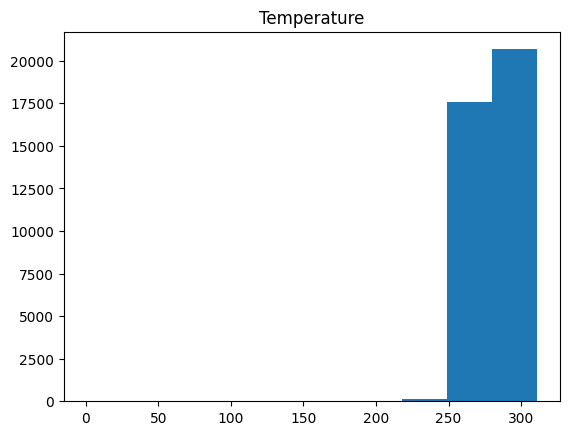

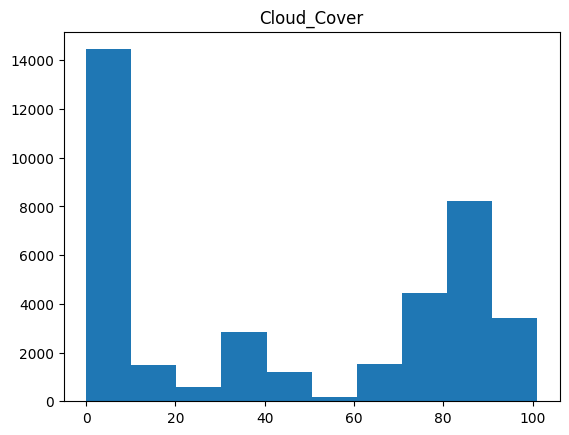

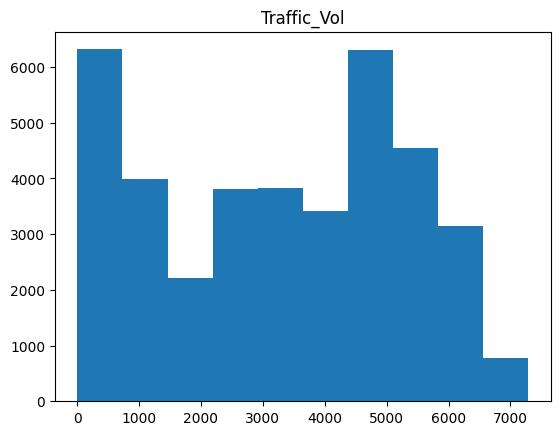

In [274]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

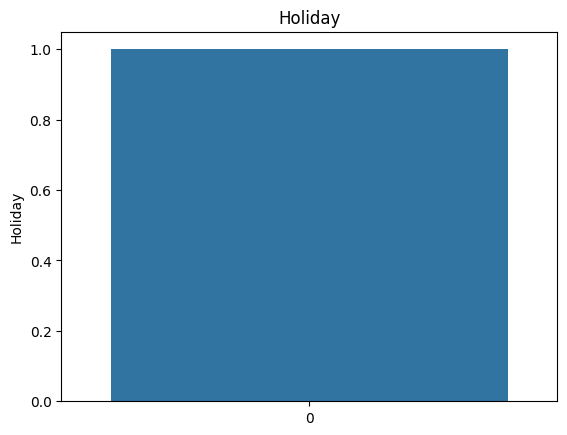

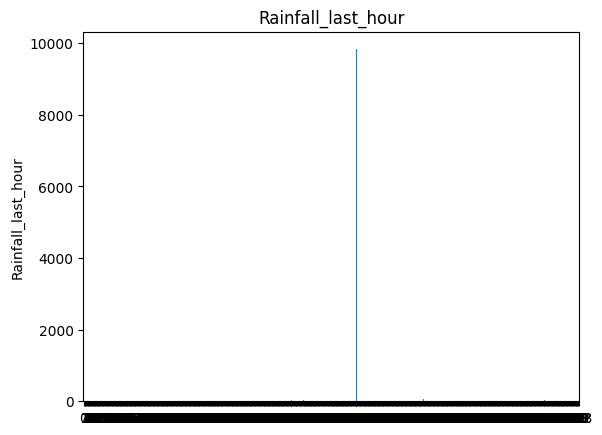

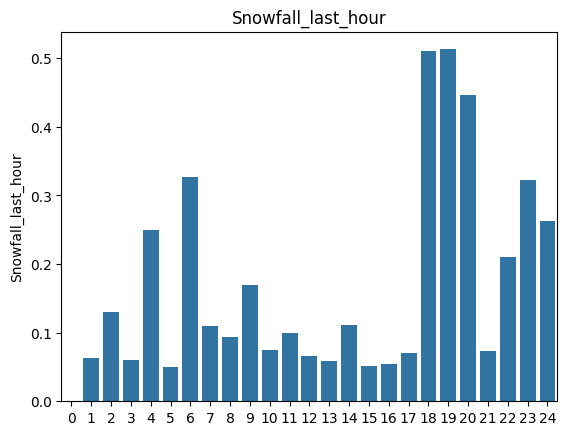

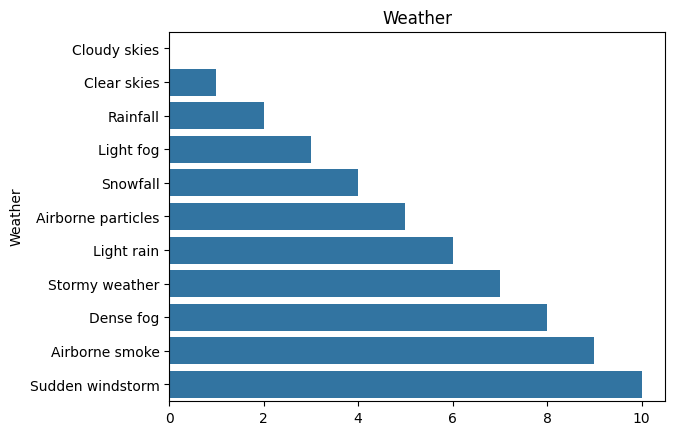

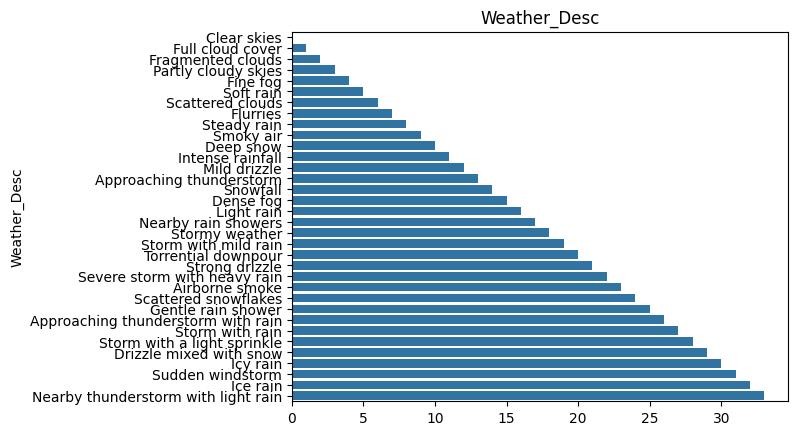

In [275]:
for i in train_cate.columns:
    sns.barplot(train_cate[i].value_counts().index).set_title(i)
    plt.show()

<Axes: >

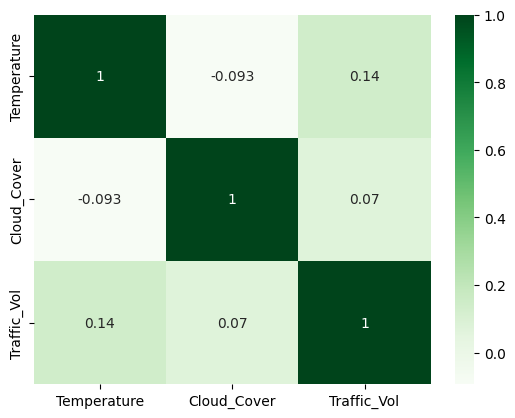

In [276]:
matrix = train_num.corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

<Axes: >

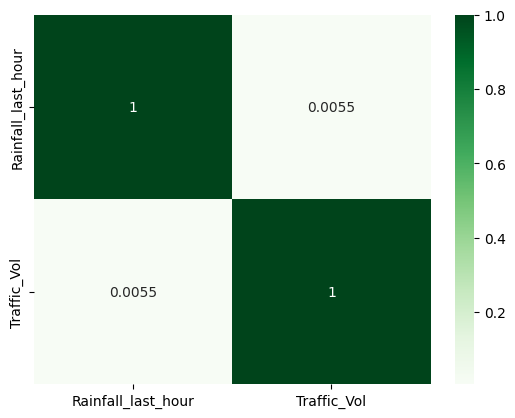

In [277]:
matrix = train[['Rainfall_last_hour','Traffic_Vol']].corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

**KEY OBSERVATION**

1. For now, its safe to conclude that Rainfall_last_hour does not seem to contribute to the traffic prediction. Realistically, rainfall does affect rainfall however the data here is highly skewed. The solution for this is to find better data or remove the column. we will remove it for now. Later we will check if it affects the model performance.
2. Feature engineer date and timestamp into more understandable format. for instance date- weekday/ weekend and timestamp could be morning, afternoon, evening and night.

In [278]:
train['TimeStamp'] = pd.to_datetime(train['TimeStamp'], format='%d/%m/%y %H:%M')
train['Date'] = pd.to_datetime(train['Date'], format='%d/%m/%y')

# Feature engineer 'date' into weekday and weekend
train['day_of_week'] = train['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
train['is_weekend'] = train['day_of_week'].isin([5, 6]).astype(int)  # 1 if Saturday/Sunday, else 0

# Feature engineer 'timestamp' into hour
train['hour'] = train['TimeStamp'].dt.hour

# Display the resulting dataframe
print(train)

# for test
test['TimeStamp'] = pd.to_datetime(test['TimeStamp'], format='%d/%m/%y %H:%M')
test['Date'] = pd.to_datetime(test['Date'], format='%d/%m/%y')

# Feature engineer 'date' into weekday and weekend
test['day_of_week'] = test['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
test['is_weekend'] = test['day_of_week'].isin([5, 6]).astype(int)  # 1 if Saturday/Sunday, else 0

# Feature engineer 'timestamp' into hour
test['hour'] = test['TimeStamp'].dt.hour



       Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  \
0          NaN       289.28                 0.0                 0.0   
1          NaN       290.26                 0.0                 0.0   
2          NaN       290.28                 0.0                 0.0   
3          NaN       290.33                 0.0                 0.0   
4          NaN       292.14                 0.0                 0.0   
...        ...          ...                 ...                 ...   
38368      NaN       301.38                 0.0                 0.0   
38369      NaN       300.28                 0.0                 0.0   
38370      NaN       300.48                 0.0                 0.0   
38371      NaN       299.08                 0.0                 0.0   
38372      NaN       298.22                 0.0                 0.0   

       Cloud_Cover       Weather         Weather_Desc           TimeStamp  \
0               40  Cloudy skies  Partly cloudy skies 2008-10-02 09:00

In [279]:
train.columns

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp', 'Date',
       'Traffic_Vol', 'day_of_week', 'is_weekend', 'hour'],
      dtype='object')

<Axes: >

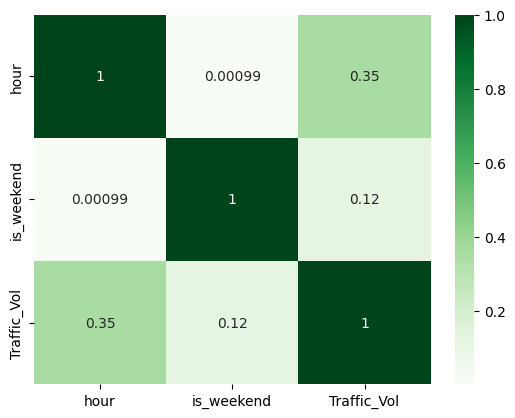

In [280]:
matrix = train[['hour','is_weekend','Traffic_Vol']].corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

In [281]:
Y = train['Traffic_Vol']

In [282]:
train = train.drop(['TimeStamp','Date','day_of_week','Rainfall_last_hour','Traffic_Vol'],axis=1)
test = test.drop(['TimeStamp','Date','day_of_week','Rainfall_last_hour','Traffic_Vol'],axis=1)

In [283]:
train['Cloud_Cover']= train['Cloud_Cover'].astype(float)
test['Cloud_Cover']= test['Cloud_Cover'].astype(float)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Snowfall_last_hour  38373 non-null  float64
 3   Cloud_Cover         38373 non-null  float64
 4   Weather             38373 non-null  object 
 5   Weather_Desc        38373 non-null  object 
 6   is_weekend          38373 non-null  int64  
 7   hour                38373 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             3 non-null      float64
 1   Temperature         2208 non-null   float64
 2   Snowfall_last_hour  220

In [284]:
train['hour']= train['hour'].astype(float)
# train['Traffic_Vol'] = train['Traffic_Vol'].astype(float)
train['is_weekend']= train['is_weekend'].astype(str)
train['Holiday']= train['Holiday'].astype(str)
train['Holiday'] = train['Holiday'].fillna(0)
train.info()

test['hour']= test['hour'].astype(float)
# test['Traffic_Vol'] = test['Traffic_Vol'].astype(float)
test['Snowfall_last_hour']= test['Snowfall_last_hour'].astype(float)
test['is_weekend']= test['is_weekend'].astype(str)
test['Holiday']= test['Holiday'].astype(str)
test['Holiday'] = test['Holiday'].fillna(0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             38373 non-null  object 
 1   Temperature         38373 non-null  float64
 2   Snowfall_last_hour  38373 non-null  float64
 3   Cloud_Cover         38373 non-null  float64
 4   Weather             38373 non-null  object 
 5   Weather_Desc        38373 non-null  object 
 6   is_weekend          38373 non-null  object 
 7   hour                38373 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             2208 non-null   object 
 1   Temperature         2208 non-null   float64
 2   Snowfall_last_hour  2208 non-null   float64

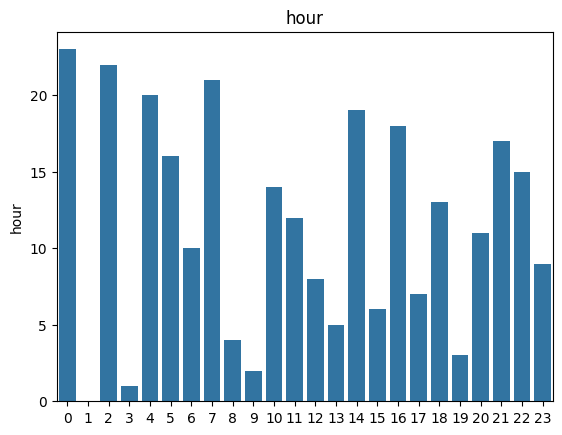

In [285]:
for i in train[['hour']]:
    sns.barplot(train[i].value_counts().index).set_title(i)
    plt.show()

**Next step- Data Preprocessing**

Normalising numeric data
and one hot encoding categorical data
combining both of them to make the X and Y data


**CATEGORICAL DATA**

HOLIDAY 0/1

WEATHER

WEATHER_DESC

IS_WEEKEND

**NUMERIC DATA**
TEMPERATURE

SNOWFALL LAST HOUR

CLOUD COVER

HOUR

In [286]:
train.columns

Index(['Holiday', 'Temperature', 'Snowfall_last_hour', 'Cloud_Cover',
       'Weather', 'Weather_Desc', 'is_weekend', 'hour'],
      dtype='object')

In [287]:
print(train.shape)
print(test.shape)

(38373, 8)
(2208, 8)


In [288]:
numerical_columns = ['Temperature','Snowfall_last_hour','Cloud_Cover','hour']
categorical_columns = ['Holiday','Weather','Weather_Desc','is_weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Normalize numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), categorical_columns)  # One-hot encode categorical columns
    ])

# Apply preprocessing to the DataFrame
X = preprocessor.fit_transform(train)
X_test = preprocessor.transform(test)

In [289]:
print(X.shape)
print(X_test.shape)

(38373, 49)
(2208, 49)


In [290]:
# train['Traffic_Vol']
# Y = ['Traffic_Vol']
# normalizedData = train['Traffic_Vol']/np.linalg.norm(train['Traffic_Vol'])
# print(type(normalizedData))
# print(Y.shape)
# preprocessor = ColumnTransformer(
#     transformers=[(
#         'num', StandardScaler(), 'Traffic_Vol')])

# # Apply preprocessing to the DataFrame
# y = preprocessor.fit_transform(Y)

In [ ]:
# y= train['Traffic_Vol']

In [291]:
print(Y.shape)

(38373,)


In [292]:
print(X.shape)
print(X_test.shape)

(38373, 49)
(2208, 49)


In [293]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [294]:
result = regressor.predict(X_test)

In [295]:
print(result.astype(int))

[1256  618  657 ... 2340 2883 1938]


In [296]:
df = pd.DataFrame(result, columns =['Traffic_Vol'])

In [297]:
print(df)

      Traffic_Vol
0          1256.0
1           618.0
2           657.0
3           403.0
4           433.0
...           ...
2203       4261.0
2204       2844.0
2205       2340.0
2206       2883.0
2207       1938.0

[2208 rows x 1 columns]


In [298]:
df.to_csv('Submission.csv',index=False)

In [299]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [300]:
result2 = reg.predict(X_test)
print(result2.astype(int))

[2090 2180 2082 ... 3723 4217 4313]


In [301]:
df2 = pd.DataFrame(result2.astype(int), columns =['Traffic_Vol'])

In [302]:
df2.to_csv('Submission2.csv',index=False)

In [303]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X, Y)
rf_predictions = rf_model.predict(X_test)

In [304]:
df3 = pd.DataFrame(rf_predictions, columns =['Traffic_Vol'])
df3.to_csv('Submission3.csv',index=False)

In [308]:
# Using Random search to find a good combination for the hyperparameters

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X, Y)

# Best hyperparameters
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [306]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X, Y)
y_pred = svr.predict(X_test)

In [307]:
df4 = pd.DataFrame(y_pred, columns =['Traffic_Vol'])
df4.to_csv('Submission4.csv',index=False)

In [314]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
lgbm.fit(X, Y)
y_pred2 = lgbm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 38373, number of used features: 34
[LightGBM] [Info] Start training from score 3293.947567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [315]:
df5 = pd.DataFrame(y_pred2, columns =['Traffic_Vol'])
df5.to_csv('Submission5.csv',index=False)